In [1]:
# data analysis
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[16,12])

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Input Data

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
print(df_train.info())
print('-'*40)
print()
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
----------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 no

In [4]:
print(df_train.head(1))
print('-'*80)
print()
print(df_test.head(1))

   PassengerId  Survived  Pclass                     Name   Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0      1   

   Parch     Ticket  Fare Cabin Embarked  
0      0  A/5 21171  7.25   NaN        S  
--------------------------------------------------------------------------------

   PassengerId  Pclass              Name   Sex   Age  SibSp  Parch  Ticket  \
0          892       3  Kelly, Mr. James  male  34.5      0      0  330911   

     Fare Cabin Embarked  
0  7.8292   NaN        Q  


In [5]:
print('The shape of trainset is', df_train.shape)
print('The shape of testset is', df_test.shape)
print()
print('The Column Name for trainset is:')
print(df_train.columns)
print()
print('The Column Name for testset is:')
print(df_test.columns)

The shape of trainset is (891, 12)
The shape of testset is (418, 11)

The Column Name for trainset is:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

The Column Name for testset is:
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


# Label Visualization

In [6]:
print('The number of survived passengers are', df_train['Survived'][df_train['Survived']==1].count())
print('The number of unsurvived passengers are', df_train['Survived'][df_train['Survived']==0].count())

The number of survived passengers are 342
The number of unsurvived passengers are 549


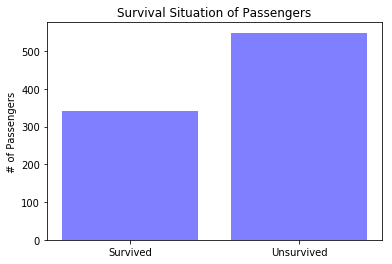

In [7]:
objects = ['Survived', 'Unsurvived']
y_pos = np.arange(len(objects))
performance = [df_train['Survived'][df_train['Survived']==1].count(), df_train['Survived'][df_train['Survived']==0].count()]
 
plt.bar(y_pos, performance, align='center', alpha=0.5, color='b')
plt.xticks(y_pos, objects)
plt.ylabel('# of Passengers')
plt.title('Survival Situation of Passengers')
 
plt.show()

In [8]:
print('The Titanic dataset is an unbalanced datset:')
print('The percentage of Survived Passengers is',\
      format(df_train['Survived'][df_train['Survived']==1].count()/df_train['Survived'].count()*100, '0.2f'))
print('The percentage of Unservived Passengers is',\
      format(df_train['Survived'][df_train['Survived']==0].count()/df_train['Survived'].count()*100, '0.2f'))

The Titanic dataset is an unbalanced datset:
The percentage of Survived Passengers is 38.38
The percentage of Unservived Passengers is 61.62


# Missing Value Check

In [9]:
print('The missing value for each feature in trainset:')
print(df_train.isnull().sum())
print(df_train.isnull().sum()/df_train.shape[0])

The missing value for each feature in trainset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


In [10]:
print('The missing value for each feature in trainset:')
print(df_test.isnull().sum())
print(df_test.isnull().sum()/df_test.shape[0])

The missing value for each feature in trainset:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64


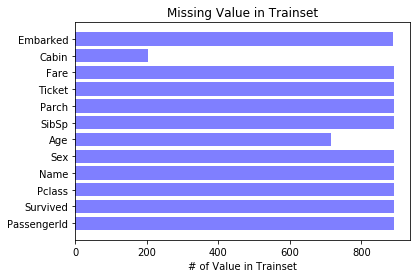

In [11]:
train_col = list(df_train.columns)
train_y = np.arange(len(train_col))
train_num = list(df_train.count())

plt.barh(train_y, train_num, align='center', alpha=0.5, color='b')
plt.yticks(train_y, train_col)
plt.xlabel('# of Value in Trainset')
plt.title('Missing Value in Trainset')
 
plt.show()

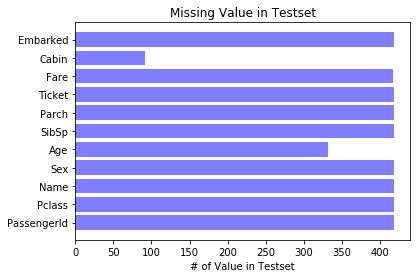

In [12]:
test_col = list(df_test.columns)
test_y = np.arange(len(test_col))
test_num = list(df_test.count())

plt.barh(test_y, test_num, align='center', alpha=0.5, color='b')
plt.yticks(test_y, test_col)
plt.xlabel('# of Value in Testset')
plt.title('Missing Value in Testset')
 
plt.show()